In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

ModuleNotFoundError: No module named 'statsmodels'

In [57]:
#Over write all matplotlib styles and graphics
sns.set()

# Linear Regression

A linear regression is a linear approximation of a causal relationship between two or more variables

## 1.0 - Simple Linear Regression
A simple linear regression is:
$$\hat{y}=b_0 +b_1x_1$$

In [58]:
data = pd.read_csv('data/1.01._Simple_linear_regression.csv')

The "Simple Linear Regression" csv file is the SAT scores and GPA of 84 students

In [59]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


Note: The "describe" method is a pandas method that provides relevant statistics for a given data set

In [60]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


We will create a linear regression that predicts a students GPA based on their SAT scores

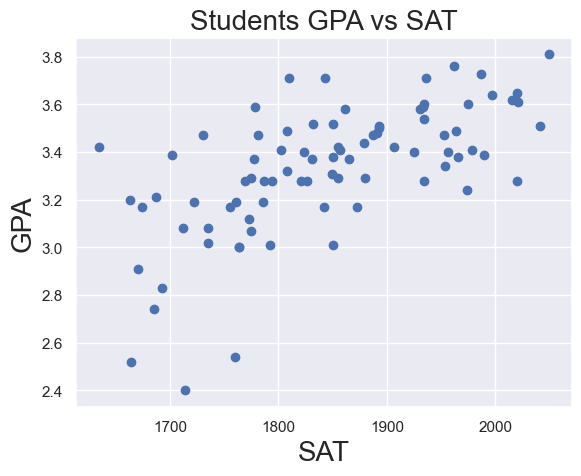

In [61]:
y = data['GPA']
x1 = data['SAT']

plt.scatter(x1,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.title('Students GPA vs SAT',fontsize=20)
#plt.grid() don't need with seaborn
plt.show()

### The actual simple regression

In [62]:
x = sm.add_constant(x1)

# Use the Ordinary Least Squares (OLS) regression
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 12 Jul 2025   Prob (F-statistic):           7.20e-11
Time:                        14:02:05   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

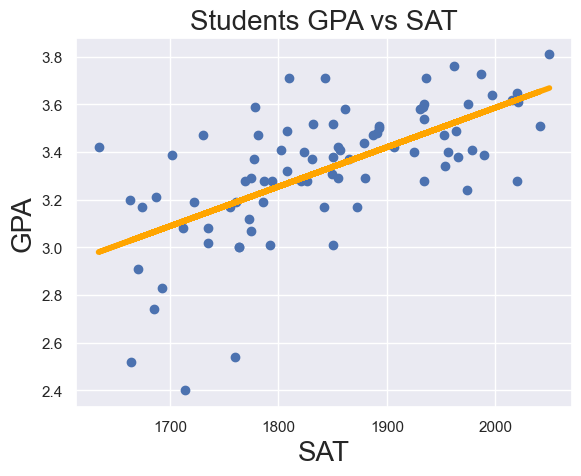

In [63]:
#print(f"B0 = {results.params['const']}, B1 = {results.params['SAT']}")
plt.scatter(x1,y)
#yhat = 0.275 + 0.0017*x1
yhat = results.params['const'] + results.params['SAT']*x1 
fig = plt.plot(x1,yhat,lw=4,c='orange')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.title('Students GPA vs SAT',fontsize=20)
#plt.grid() don't need with seaborn
plt.show()

In [64]:
def predict_y(x1,results):
    y_hat = results.params['const'] + results.params['SAT']*x1
    #y_hat = 0.0017*x1 + 0.275
    return y_hat

predict_y(1850,results)

3.3380631923319877